In [1]:
import os
import pandas as pd
import csv
import numpy as np
import nltk
from nltk.stem import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
import seaborn as sb
test_filename = 'test1.csv'
train_filename = 'train1.csv'
train_news = pd.read_csv(train_filename)
test_news = pd.read_csv(test_filename)
def data_obs():
    print("training dataset size:")
    print(train_news.shape)
    print(train_news.head(10))
    print("Testing dataset size:")
    print(test_news.shape)
    print(test_news.head(10))
data_obs()



training dataset size:
(10240, 2)
                                           Statement  Label
0  Says the Annies List political group supports ...  False
1  When did the decline of coal start? It started...   True
2  Hillary Clinton agrees with John McCain "by vo...   True
3  Health care reform legislation is likely to ma...  False
4  The economic turnaround started at the end of ...   True
5  The Chicago Bears have had more starting quart...   True
6  Jim Dunnam has not lived in the district he re...  False
7  I'm the only person on this stage who has work...   True
8  However, it took $19.5 million in Oregon Lotte...   True
9  Says GOP primary opponents Glenn Grothman and ...   True
Testing dataset size:
(2279, 2)
                                           Statement  Label
0  Building a wall on the U.S.-Mexico border will...   True
1  When asked by a reporter whether hes at the ce...  False
2  Over the past five years the federal governmen...   True
3  Says that Tennessee law require

<AxesSubplot:xlabel='Label', ylabel='count'>

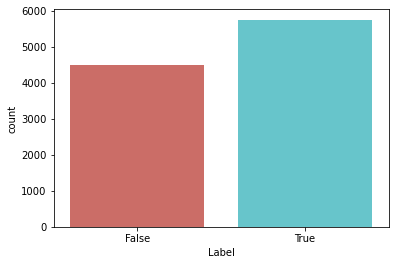

In [2]:
def create_distribution(dataFile):
    return sb.countplot(x='Label', data=dataFile, palette='hls')
create_distribution(train_news)
create_distribution(test_news)

In [3]:
def data_qualityCheck():
    
    print("Checking data qualitites...")
    train_news.isnull().sum()
    train_news.info()
        
    print("check finished.")
    test_news.isnull().sum()
    test_news.info()
data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  10240 non-null  object
 1   Label      10240 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 90.1+ KB
check finished.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2279 entries, 0 to 2278
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  2279 non-null   object
 1   Label      2279 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 20.2+ KB


In [4]:
data_TrainNews = pd.read_csv('train1.csv')
def stem_tokens(tokens, stemmer):
    stemmed = []
    for token in tokens:
        stemmed.append(stemmer.stem(token))
    return stemmed
def process_data(data,exclude_stopword=True,stem=True):
    tokens = [w.lower() for w in data]
    tokens_stemmed = tokens
    tokens_stemmed = stem_tokens(tokens, eng_stemmer)
    tokens_stemmed = [w for w in tokens_stemmed if w not in stopwords ]
    return tokens_stemmed
def create_unigram(words):
    assert type(words) == list
    return words
def create_bigrams(words):
    assert type(words) == list
    skip = 0
    join_str = " "
    Len = len(words)
    if Len > 1:
        lst = []
        for i in range(Len-1):
            for k in range(1,skip+2):
                if i+k < Len:
                    lst.append(join_str.join([words[i],words[i+k]]))
    else:
        lst = create_unigram(words)
    return lst

porter = PorterStemmer()

def tokenizer(text):
    return text.split()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]
